In [3]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import os

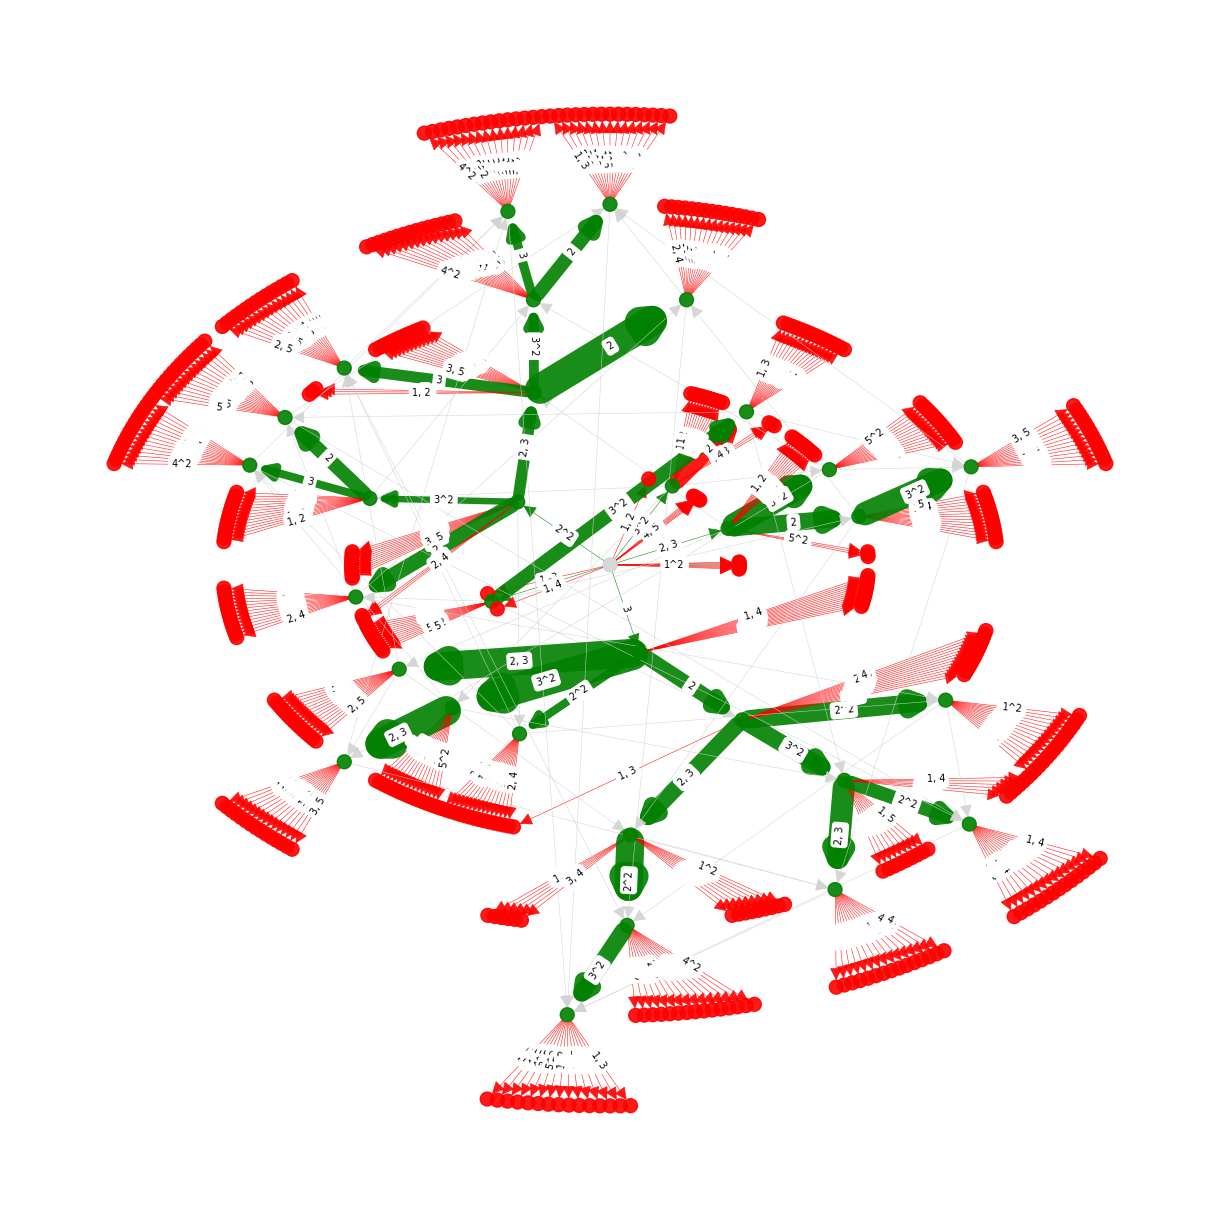

In [5]:



n_protons, n_electrons = (40,40)

data_dict_path = f"/Users/moustholmes/Projects/METAL-AI/data/ion_dicts_new/data_dict_{n_protons}_{n_electrons}.pkl"
# Use 'rb' to read in binary mode
with open(data_dict_path, 'rb') as file:
    data_dict = pickle.load(file)

def node_color(converged):
    if converged is None:
        return 'lightgray'
    elif converged:
        return 'blue'
    else:
        return 'red'


G = nx.DiGraph(ranksep=10)#ranksep=[0.1,0.1,10,30],voro_margin=1
line_width_bias = 0.1
effect_scale = 2
line_width = 0.3
base_weight = 3
base_effect = 0.3

added_ground_state_node = False


assert (n_protons, n_electrons) in data_dict
    #loop through ASFs smallest to largest
for key_tuple, value in sorted(data_dict[(n_protons, n_electrons)].items(), key=lambda x: len(x[0])):

    # if the ASF have no previous ASF
    if len(key_tuple) == 2:
        if not added_ground_state_node:
            ground_state_node = ()
            G.add_node(ground_state_node, converged=None)
            added_ground_state_node = True
        
        
        # print(value['converged'])
        # print(np.any(value['converged']))
        G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['converged']==True))
        for i, converged in enumerate(value['converged']):
            if not np.isnan(converged):
                edge_label =', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(value['excitations'][i]).items() if num != 0)
                G.add_edge(ground_state_node, key_tuple, converged = converged, effect = base_effect, weight=base_weight,label=edge_label)

        # G.add_edge(root, prev_node, color='red',weight=weight,label=value['excitations'][not value['index']])
    else:
        # if the ASF has previous ASFs add node and edge to previous ASF
        # print(value['converged'])
        # print(np.any(value['converged']))
        G.add_node(key_tuple, label=str(key_tuple), converged=np.any(value['converged']==True))

        for i, converged in enumerate(value['converged']):
            if not np.isnan(converged):
                edge_label =', '.join(f"{num}^{cnt}" if cnt > 1 else f"{num}" for num, cnt in Counter(value['excitations'][i]).items() if num != 0)
                if 'effect' in value:
                    effect = value['effect'][i] *effect_scale
                    if np.isnan(effect):
                        effect = base_effect
                else:
                    effect = base_effect
                G.add_edge( key_tuple[:i] + key_tuple[i+1:], key_tuple, label=edge_label, converged = converged, effect = effect, weight=base_weight)
            else:
                if key_tuple[:i] + key_tuple[i+1:] in G:
                    if np.any(value['converged']==True):
                        G.add_edge(key_tuple[:i] + key_tuple[i+1:], key_tuple, effect = base_effect, converged = None, weight=0)

            

color_map = ['lightgray' if node_info['converged'] is None else 'green' if node_info['converged'] else 'red'
                for node, node_info in G.nodes(data=True)]


edge_colors = ['lightgray' if edge_color is None else 'green' if edge_color else 'red' for edge_color in nx.get_edge_attributes(G,'converged').values()]

# # edge_color=edge_colors
width = [effect + 0.1 for effect in nx.get_edge_attributes(G,'effect').values()]

edge_labels = nx.get_edge_attributes(G, 'label') 
# print(ground_state_node)
pos = nx.nx_agraph.graphviz_layout(G, prog='twopi',root=ground_state_node)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color=color_map, edge_color=edge_colors,width=width, node_size=100, alpha=0.9, arrowsize=20, arrowstyle='-|>')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=7)

plt.show()


In [139]:
import os
import pickle
def load_and_merge_pickles(folder_path):
    combined_dict = {}

    # Loop over all files in the specified folder
    for filename in os.listdir(folder_path):
        # print(filename)
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'rb') as f:
            loaded_dict = pickle.load(f)
            # Ensure the loaded object is a dictionary
            if isinstance(loaded_dict, dict):
                combined_dict.update(loaded_dict)
            else:
                print(f"Warning: {filename} does not contain a dictionary. Skipping.")
    
    return combined_dict

folder_path = "/Users/moustholmes/Projects/METAL-AI/data/ion_dicts_new"  # Replace with your folder path
data_dict = load_and_merge_pickles(folder_path)


with open('/Users/moustholmes/Projects/METAL-AI/data/data_dict_Li-Rh.pkl', 'wb') as file:
    pickle.dump(data_dict, file)


In [4]:
data_dict_path = f"/Users/moustholmes/Projects/METAL-AI/data/data_dict_Li-Rh.pkl"
# Use 'rb' to read in binary mode
with open(data_dict_path, 'rb') as file:
    data_dict = pickle.load(file)

In [11]:
total_cnt = 0
converged_cnt = 0
effect_cnt = 0
for key, value in data_dict.items():
    for asf_key, asf_dict in value.items():
        total_cnt += 1
        if np.any(asf_dict['converged']==True).all():
            # print(asf_dict['converged'])
            converged_cnt += 1
        if np.any(~np.isnan(asf_dict['effect'])).all():
            effect_cnt += 1
            # print(asf_dict['effect'])

In [12]:
print(total_cnt)
print(converged_cnt)
print(effect_cnt)

125330
51676
51527


In [141]:
data_dict_test.keys()

dict_keys([(36, 35), (31, 28), (42, 39), (26, 24), (41, 40), (24, 21), (10, 9), (8, 5), (15, 15), (15, 14), (34, 31), (10, 8), (41, 41), (31, 29), (36, 34), (36, 36), (19, 16), (24, 22), (8, 6), (34, 33), (12, 9), (34, 32), (8, 7), (24, 23), (26, 26), (19, 17), (36, 33), (38, 36), (28, 27), (43, 43), (15, 13), (15, 12), (43, 42), (26, 23), (38, 37), (38, 35), (24, 24), (43, 40), (40, 39), (40, 38), (34, 34), (43, 41), (32, 32), (9, 6), (9, 7), (22, 22), (22, 20), (45, 44), (32, 31), (11, 9), (39, 38), (11, 11), (29, 29), (20, 19), (20, 18), (29, 28), (11, 10), (39, 39), (11, 8), (32, 30), (22, 21), (22, 19), (13, 11), (18, 18), (20, 20), (47, 44), (30, 30), (13, 10), (45, 42), (13, 12), (30, 27), (13, 13), (45, 43), (25, 23), (35, 32), (18, 17), (27, 27), (16, 13), (18, 16), (37, 36), (35, 33), (25, 22), (5, 3), (14, 14), (37, 34), (30, 29), (27, 25), (40, 40), (18, 15), (30, 28), (37, 35), (25, 25), (5, 4), (42, 41), (35, 34), (7, 6), (32, 29), (14, 11), (41, 38), (9, 9), (16, 14), (3

In [21]:
data_dict = resulting_dict
ion_dict = data_dict[(39,39)]
for asf_key, asf_dict in ion_dict.items():
    print(asf_key)
    print(asf_dict)
    # for i in range(len(asf_dict['converged'])):

        # if asf_dict['converged'][i] == 0:
            
            
        #     print(asf_dict['converged'])
        #     previous_asf = asf_key[:i] + asf_key[i+1:]
        #     assert previous_asf in ion_dict
        #     assert np.any(ion_dict[previous_asf]['converged']==True)
        #     print(ion_dict[previous_asf]['converged'])
        #     print()


((2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 1, 0, 1, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 2, 0, 0, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0))
{'excitations': ((2, 4), (2, 2), (0, 0)), 'converged': array([ 0., nan, nan]), 'effect': array([nan, nan, nan]), 'eigenvalue_sum': array([nan, nan, nan]), 'runtime': array([0.85768294,        nan,        nan]), 'slices': None}
((2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 0, 0, 1, 1, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 0, 2, 0, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 1, 1, 0, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0))
{'excitations': ((4, 5), (3, 3), (2, 3), (0, 0)), 'converged': array([ 0., nan, nan, nan]), 'effect': array([nan, nan, nan, nan]), 'eigenvalue_sum': array([nan, nan, nan, nan]), 'runtime': array([1.41204333,        nan,        nan,        nan]), 'slices': None}
((2, 2, 6, 2, 6, 10, 2, 6, 1, 0, 2, 0, 0, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0), (2, 2, 6, 2, 6, 10, 2,

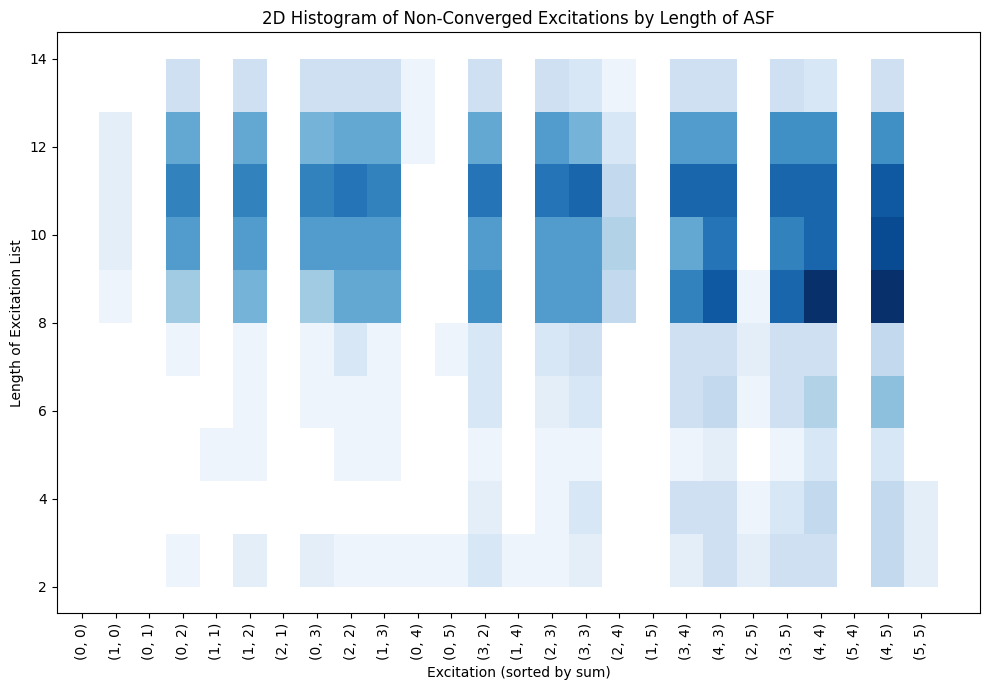

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data preparation
excitation_counts = []
excitation_lengths = []
all_excitations = set()

# Loop through each ASF_dict for the selected ion key (30, 29)
for asf_key, asf_dict in data_dict[(30, 29)].items():
    excitations = asf_dict['excitations']
    converged = asf_dict['converged']
    
    # Identify non-converged cases (0 or nan) and collect all excitations
    for idx, exc in enumerate(excitations):
        all_excitations.add(exc)  # Keep track of all unique excitations
        if converged[idx] == 0:  # non-converged case
            excitation_counts.append(exc)
            excitation_lengths.append(len(excitations))

# Convert data to numpy array for easier plotting
excitation_counts = np.array(excitation_counts)
excitation_lengths = np.array(excitation_lengths)

# Sorting excitations by the sum of their values
sorted_excitations = sorted(all_excitations, key=lambda x: sum(x))

# Create a dictionary to map excitation tuples to an index for easier plotting
excitation_map = {exc: i for i, exc in enumerate(sorted_excitations)}
mapped_excitation_counts = [excitation_map[tuple(e)] for e in excitation_counts]

# 2D Histogram Plot including all excitations
plt.figure(figsize=(10, 7))
sns.histplot(
    x=mapped_excitation_counts, y=excitation_lengths, bins=(len(sorted_excitations), 10), 
    discrete=(True, False), cmap="Blues"
)
plt.title('2D Histogram of Non-Converged Excitations by Length of ASF')
plt.xlabel('Excitation (sorted by sum)')
plt.ylabel('Length of Excitation List')

# Adjust x-axis ticks to show the actual excitation tuples in simple format
plt.xticks(ticks=range(len(sorted_excitations)), labels=[str(exc) for exc in sorted_excitations], rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

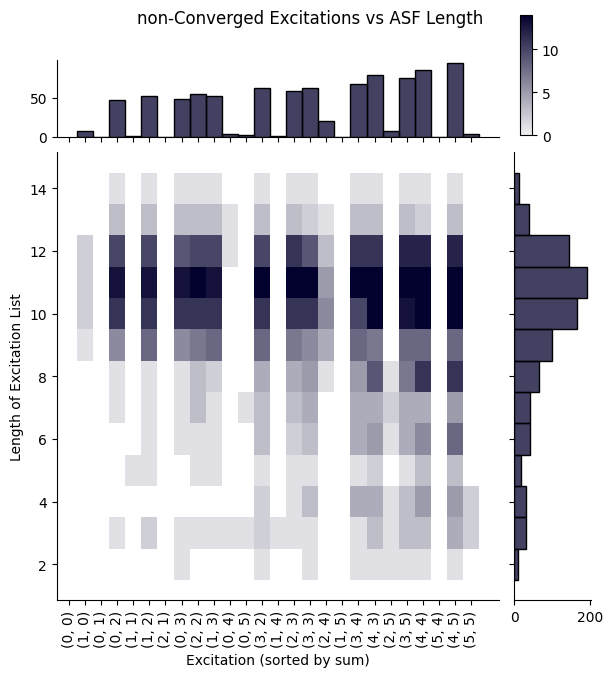

In [5]:
ion_key = (30, 29)  # This would be dynamically selected in your full dataset
num_protons, num_electrons = ion_key
ionization_level = num_protons - num_electrons
atom_name = f"Atom with {num_protons} protons and ionization level {ionization_level}"

# Data preparation
excitation_counts = []
excitation_lengths = []
all_excitations = set()

# Loop through each ASF_dict for the selected ion key (30, 29)
for asf_key, asf_dict in data_dict[(30, 29)].items():
    excitations = asf_dict['excitations']
    converged = asf_dict['converged']
    
    # Identify non-converged cases (0 or nan) and collect all excitations
    for idx, exc in enumerate(excitations):
        all_excitations.add(exc)  # Keep track of all unique excitations
        if converged[idx] == 0:  # non-converged case
            excitation_counts.append(exc)
            excitation_lengths.append(len(excitations))

# Convert data to numpy array for easier plotting
excitation_counts = np.array(excitation_counts)
excitation_lengths = np.array(excitation_lengths)

# Sorting excitations by the sum of their values
sorted_excitations = sorted(all_excitations, key=lambda x: sum(x))

# Create a dictionary to map excitation tuples to an index for easier plotting
excitation_map = {exc: i for i, exc in enumerate(sorted_excitations)}
mapped_excitation_counts = [excitation_map[tuple(e)] for e in excitation_counts]

atom_name = "Yttrium IV"
full_title = f'non-Converged Excitations vs ASF Length'
# Create the JointGrid again
g = sns.JointGrid(x=mapped_excitation_counts, y=excitation_lengths, marginal_ticks=True)

# Create an inset legend for the histogram colorbar in the top right
cax = g.figure.add_axes([.85, .84, .02, .2])

# Create the joint and marginal histogram plots with discrete settings for marginals
g.plot_joint(
    sns.histplot, discrete=(True, True), bins=(len(sorted_excitations), max(excitation_lengths)), cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="bars", color="#03012d", bins=len(excitation_lengths), discrete=True)

# Adding a figure-level title in the correct format
plt.suptitle(full_title, y=1.05)

# Adjust x-axis ticks to show the actual excitation tuples
g.ax_joint.set_xticks(range(len(sorted_excitations)))
g.ax_joint.set_xticklabels([str(exc) for exc in sorted_excitations], rotation=90)

# Adding the correct labels to the joint plot axes
g.ax_joint.set_xlabel('Excitation (sorted by sum)')
g.ax_joint.set_ylabel('Length of Excitation List')

# Display the plot with adjusted layout
# plt.tight_layout(rect=[0, 0.5, 1, 0.95])  # To accommodate the figure-level title
plt.show()

In [8]:
sorted_excitations

[(0, 0),
 (1, 0),
 (0, 1),
 (0, 2),
 (1, 1),
 (1, 2),
 (2, 1),
 (0, 3),
 (2, 2),
 (1, 3),
 (0, 4),
 (0, 5),
 (3, 2),
 (1, 4),
 (2, 3),
 (3, 3),
 (2, 4),
 (1, 5),
 (3, 4),
 (4, 3),
 (2, 5),
 (3, 5),
 (4, 4),
 (5, 4),
 (4, 5),
 (5, 5)]

In [7]:
len(sorted_excitations)

26

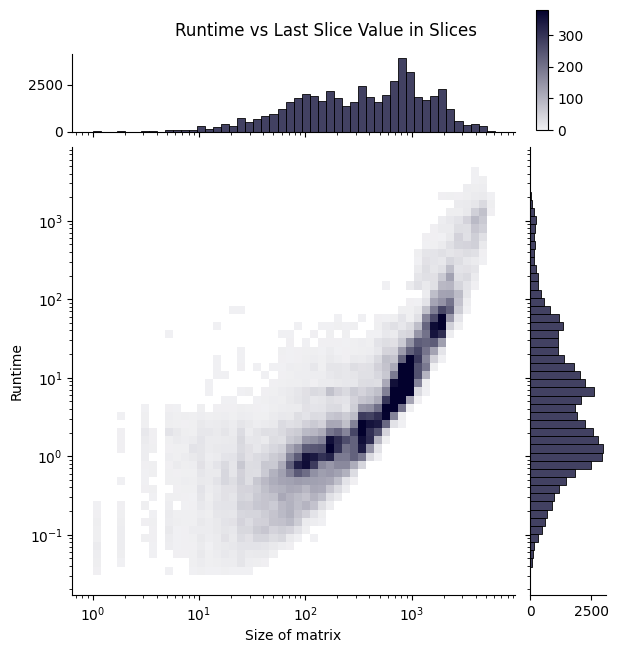

In [81]:
n_bins = 50

# Data preparation
runtime_data = []
last_slice_values = []

# Loop through each ASF_dict for the selected ion key (30, 29)
for ion_key, ion_dict in data_dict.items():
    for asf_key, asf_dict in ion_dict.items():
        slices = asf_dict.get('slices', None)
        runtime = asf_dict.get('runtime', None)

        if slices is not None:
            for idx in range(len(slices)):
                if not np.isnan(runtime[idx]):

                    last_slice = slices[-1][-1]  # Get the last element in the last list
                    runtime_value = runtime[idx]  # Get the last runtime value

                    last_slice_values.append(last_slice)
                    runtime_data.append(runtime_value)
    


# Create the JointGrid for runtime vs last slice value
g = sns.JointGrid(x=last_slice_values, y=runtime_data, marginal_ticks=True)

# Create an inset legend for the histogram colorbar in the top right
cax = g.figure.add_axes([.85, .84, .02, .2])

# Create the joint and marginal histogram plots with discrete settings
g.plot_joint(
    sns.histplot, discrete=(False, False),bins = n_bins, cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax, log_scale=(True, True)

)
g.plot_marginals(sns.histplot, element="bars", color="#03012d",bins=n_bins, discrete=False, log_scale=False)



# Adding a figure-level title in the correct format
plt.suptitle(f'Runtime vs Last Slice Value in Slices', y=1.02)


# Adding the correct labels to the joint plot axes
g.ax_joint.set_xlabel('Size of matrix')
g.ax_joint.set_ylabel('Runtime')

# Display the plot with adjusted layout
plt.show()


In [124]:
# Data preparation
effect_data = []
eigenvalue_sum_data = []

# Loop through each ASF_dict for the selected ion key (30, 29)
for ion_key, ion_dict in data_dict.items():
    for asf_key, asf_dict in ion_dict.items():
        effect = asf_dict.get('effect', None)
        eigenvalue_sum = asf_dict.get('eigenvalue_sum', None)

        for i in range(len(effect)):
            if not np.isnan(effect[i]):

                effect_data.append(effect[i])
                for j in range(len(effect)):
                    if not np.isnan(eigenvalue_sum[j]):
                        eigenvalue_sum_current = float(eigenvalue_sum[j])
                        break

                previous_asf = asf_key[:i] + asf_key[i+1:]

                for k in range(len(ion_dict[previous_asf]['effect'])):
                    if not np.isnan(ion_dict[previous_asf]['eigenvalue_sum'][k]):
                        eigenvalue_sum_prev = float(ion_dict[previous_asf]['eigenvalue_sum'][k])
                        break

                eigenvalue_sum_data.append(eigenvalue_sum_current - eigenvalue_sum_prev)

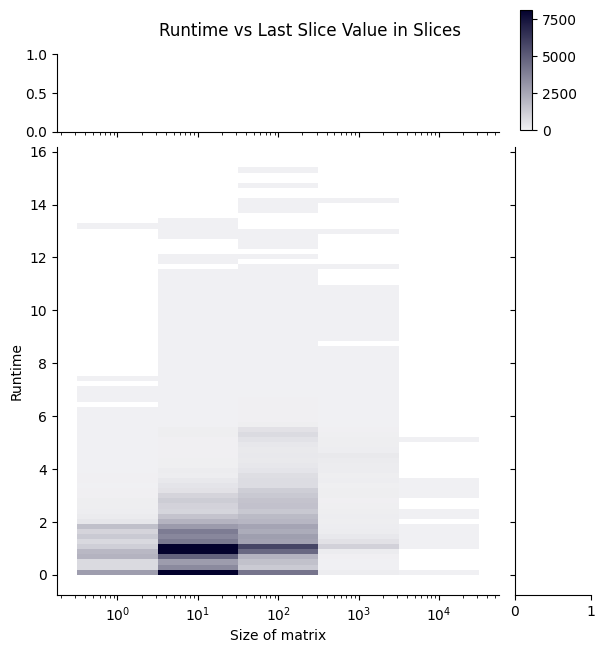

In [32]:
# Data preparation
effect_data = []
slices_data = []

# Loop through each ASF_dict for the selected ion key (30, 29)
for ion_key, ion_dict in data_dict.items():
    for asf_key, asf_dict in ion_dict.items():
        effect = asf_dict.get('effect', None)
        eigenvalue_sum = asf_dict.get('eigenvalue_sum', None)
        slices = asf_dict.get('slices', None)

        for i in range(len(effect)):
            if not np.isnan(effect[i]):

                effect_data.append(effect[i])
                slices_data.append(slices[i][1]-slices[i][0])
                # for j in range(len(effect)):

# Create the JointGrid for runtime vs last slice value
g = sns.JointGrid(x=slices_data, y=effect_data, marginal_ticks=True)

# Create an inset legend for the histogram colorbar in the top right
cax = g.figure.add_axes([.85, .84, .02, .2])

# Create the joint and marginal histogram plots with discrete settings
g.plot_joint(
    sns.histplot, discrete=(True, False), log_scale=(True, False), bins = (800,80), cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax,
)

# Set a log scaling on the y axis
g.ax_joint.set(xscale="log")

# g.plot_marginals(sns.histplot, element="bars", color="#03012d",bins=(80,80), discrete=(False, False))



# Adding a figure-level title in the correct format
plt.suptitle(f'Runtime vs Last Slice Value in Slices', y=1.02)


# Adding the correct labels to the joint plot axes
g.ax_joint.set_xlabel('Size of matrix')
g.ax_joint.set_ylabel('Runtime')

# Display the plot with adjusted layout
plt.show()

it doesn't seam like there is a strong correlation between the number of added eigenvectors and the effect


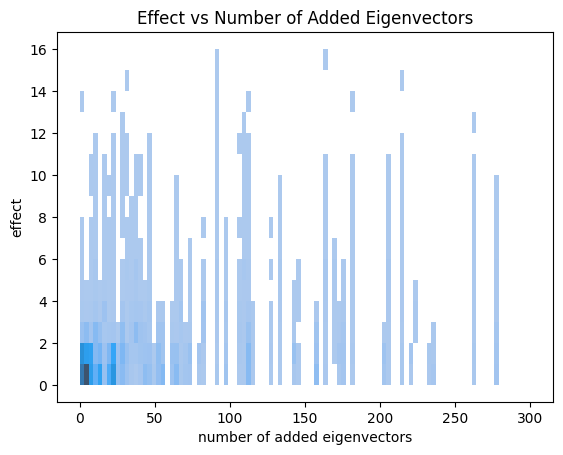

In [51]:
sns.histplot(
    x=slices_data, y=effect_data,
    binwidth=(3,1), binrange=((0, 300),(0,16)),
    log_scale=(False, False),
)
plt.xlabel('number of added eigenvectors')
plt.ylabel('effect')
plt.title('Effect vs Number of Added Eigenvectors')
print("it doesn't seam like there is a strong correlation between the number of added eigenvectors and the effect")

Text(0.5, 1.0, 'Effect vs Number of Added Eigenvectors')

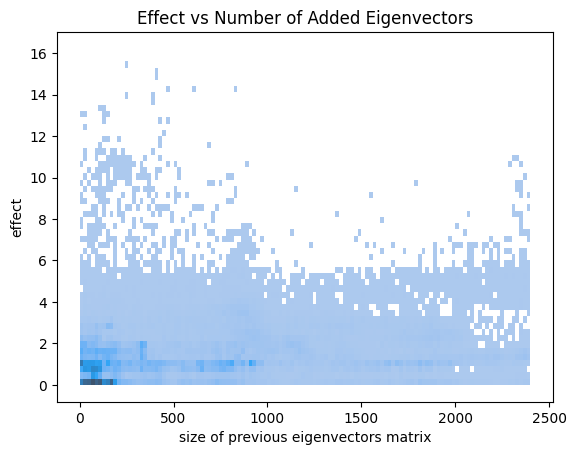

In [59]:
# does the effect depend on the size of the previous eigenvector matrix?
# larger matrix -> larger effect?

# Data preparation
effect_data = []
matrix_size = []

# Loop through each ASF_dict for the selected ion key (30, 29)
for ion_key, ion_dict in data_dict.items():
    for asf_key, asf_dict in ion_dict.items():
        effect = asf_dict.get('effect', None)
        eigenvalue_sum = asf_dict.get('eigenvalue_sum', None)
        slices = asf_dict.get('slices', None)

        for i in range(len(effect)):
            if not np.isnan(effect[i]):

                effect_data.append(effect[i])
                # slices_data.append(slices[i][1]-slices[i][0])
                previous_asf = asf_key[:i] + asf_key[i+1:]
                matrix_size.append(ion_dict[previous_asf]['slices'][-1][-1])

sns.histplot(
    x=matrix_size, y=effect_data,
    binwidth=(20,0.3), binrange=((0, 2400),(0,16)),
    log_scale=(False, False),
)
plt.xlabel('size of previous eigenvectors matrix')
plt.ylabel('effect')
plt.title('Effect vs Number of Added Eigenvectors')

In [125]:
print(len(effect_data))
print(len(eigenvalue_sum_data))

129468
129468


/Users/moustholmes/miniconda3/envs/metal-ai/lib/python3.9/site-packages/seaborn/distributions.py:198: RuntimeWarning: invalid value encountered in divide
  normalized_values = np.cumsum(sorted_values) / values.sum()


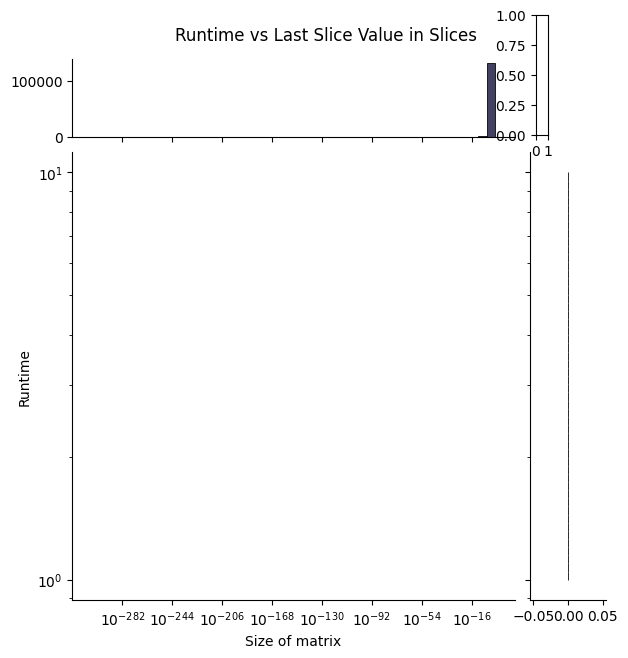

In [13]:
# Data preparation
effect_data = []
eigenvalue_sum_data = []

# Loop through each ASF_dict for the selected ion key (30, 29)
for ion_key, ion_dict in data_dict.items():
    for asf_key, asf_dict in ion_dict.items():
        effect = asf_dict.get('effect', None)
        eigenvalue_sum = asf_dict.get('eigenvalue_sum', None)

        for i in range(len(effect)):
            if not np.isnan(effect[i]):

                effect_data.append(effect[i])
                for j in range(len(effect)):
                    if not np.isnan(eigenvalue_sum[j]):
                        eigenvalue_sum_current = float(eigenvalue_sum[j])
                        break

                previous_asf = asf_key[:i] + asf_key[i+1:]

                for k in range(len(ion_dict[previous_asf]['effect'])):
                    if not np.isnan(ion_dict[previous_asf]['eigenvalue_sum'][k]):
                        eigenvalue_sum_prev = float(ion_dict[previous_asf]['eigenvalue_sum'][k])
                        break

                eigenvalue_sum_data.append(eigenvalue_sum_current - eigenvalue_sum_prev)
                


# eigenvalue_sum_data_scaled = (np.array(eigenvalue_sum_data) - min(eigenvalue_sum_data)+100)/(max(eigenvalue_sum_data) - min(eigenvalue_sum_data))+np.finfo(float).eps

n_bins = 50


    


# Create the JointGrid for runtime vs last slice value
g = sns.JointGrid(x=effect_data, y=eigenvalue_sum_data, marginal_ticks=True)

# Create an inset legend for the histogram colorbar in the top right
cax = g.figure.add_axes([.85, .84, .02, .2])

# Create the joint and marginal histogram plots with discrete settings
g.plot_joint(
    sns.histplot, discrete=(False, False),bins = n_bins, cmap="light:#03012d", 
    pmax=.8, cbar=True, cbar_ax=cax, log_scale=(True, True)

)
g.plot_marginals(sns.histplot, element="bars", color="#03012d",bins=n_bins, discrete=False, log_scale=False)



# Adding a figure-level title in the correct format
plt.suptitle(f'Runtime vs Last Slice Value in Slices', y=1.02)


# Adding the correct labels to the joint plot axes
g.ax_joint.set_xlabel('Size of matrix')
g.ax_joint.set_ylabel('Runtime')

# Display the plot with adjusted layout
plt.show()

In [88]:
len(eigenvalue_sum_data)

129468

In [119]:
print(min(eigenvalue_sum_data))
print(max(eigenvalue_sum_data))
eigenvalue_sum_data_scaled = (np.array(eigenvalue_sum_data) - min(eigenvalue_sum_data)+10)/(max(eigenvalue_sum_data) - min(eigenvalue_sum_data))
print(min(eigenvalue_sum_data_scaled))
print(max(eigenvalue_sum_data_scaled))

-61080443.088466935
-44.04297728835
1.6371864225301635e-07
1.0000001637186422


In [134]:
ryd_to_kelvin = 11606 * 13.605703976
temp_kelvin = 5000
eigenvalue_sum_data_energy = np.exp(-np.array(eigenvalue_sum_data) * ryd_to_kelvin / temp_kelvin)

/var/folders/s2/8rc4lm651yq7h79nm3jxjzmm0000gn/T/ipykernel_15585/3725687382.py:3: RuntimeWarning: overflow encountered in exp
  eigenvalue_sum_data_energy = np.exp(-np.array(eigenvalue_sum_data) * ryd_to_kelvin / temp_kelvin)


<Axes: ylabel='Count'>

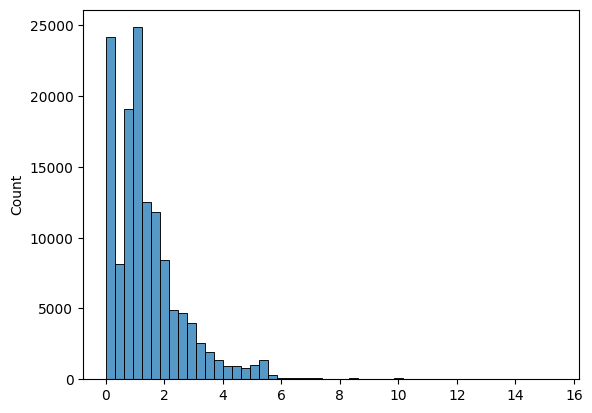

In [14]:
sns.histplot(effect_data, bins=50,log_scale=False)

<Axes: ylabel='Count'>

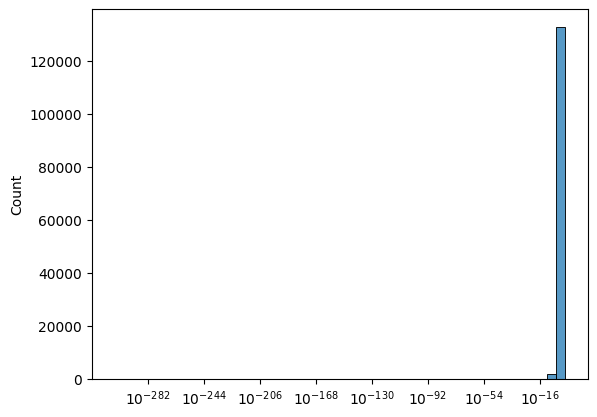

In [15]:
sns.histplot(effect_data, bins=50,log_scale=True)

In [136]:
min(eigenvalue_sum_data)

-36089405.91947605

In [103]:
max(eigenvalue_sum_data)

-44.04297728835

In [89]:
len(effect_data)

129468